In [2]:
# Import libraries
import sys
import os
from compositionspace.datautils import DataPreparation
import json 
import pandas as pd
import matplotlib.pylab as plt
from compositionspace.segmentation import CompositionClustering
from compositionspace.postprocessing import PostprocessData

In [2]:
experiment_param = json.load(open("experiment_params.json","r"))
data = DataPreparation(params=experiment_param)
data.chunkify_apt_df("data")
data.get_voxels()
data.calculate_voxel_composition(data.voxel_files[0])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/23259 [00:00<?, ?it/s]

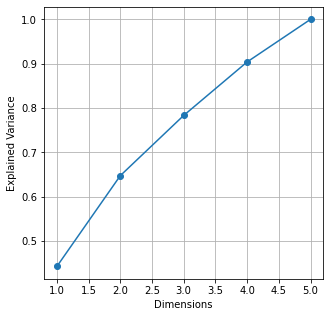

In [2]:
experiment_param = json.load(open("experiment_params.json","r"))
comps = CompositionClustering(params=experiment_param)
res = comps.get_PCA_cumsum("3Vox_ratios_filenames_num_MR_Grp.h5", "output/file_R31_06365-v02_pos_small_chunks_arr.h5")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.19it/s]


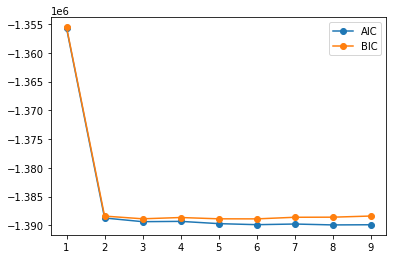

In [3]:
res = comps.get_bics_minimization("3Vox_ratios_filenames_num_MR_Grp.h5", "output/file_R31_06365-v02_pos_small_chunks_arr.h5")

In [4]:
ml_params = experiment_param["parameters"]["ml_models"]["GaussianMixture"]
comps.get_composition_clusters("3Vox_ratios_filenames_num_MR_Grp.h5", "output/file_R31_06365-v02_pos_small_chunks_arr.h5", ml_params, "out.h5")

[34, 51, 23174]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23259/23259 [00:04<00:00, 5315.52it/s]


In [16]:
Composition_Space.plot3d()

/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_0
/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_1


In [3]:
experiment_param = json.load(open("experiment_params.json","r"))
pdata = PostprocessData(params=experiment_param)

NameError: name 'OutFile_path' is not defined

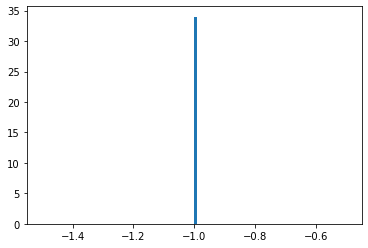

In [8]:
pdata.DBSCAN_clustering("out.h5", cluster_id = 0, eps = 5., min_samples= 50,
                        plot=True, plot3d=True, save=True)